## Importing Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

## Splitting data

In [2]:
df = pd.read_parquet('D:/healthplusclinic/data/03-feature_eng_data/engineered_data.parquet')

In [3]:
df.head()

,lead_time_days,wait_time_minutes,is_no_show_0_1,age,insurance_type,clinic_assignment,city,is_weekend,time_of_day,open_hours,age_group,total_appointments,patient_no_show_rate,is_weekdays,patient_clinic_frequency_visit
0,2,19.0,0,63,private,full-time,houston,False,Afternoon,10,old,0,0.0,True,medium_volume_clinic
1,0,21.0,0,63,private,full-time,atlanta,False,Afternoon,8,old,1,0.0,True,low_volume_clinic
2,9,33.0,0,63,private,full-time,new york,False,Evening,9,old,2,0.0,True,high_volume_clinic
3,15,21.0,0,63,private,full-time,houston,True,Morning,10,old,3,0.0,False,medium_volume_clinic
4,8,54.0,0,63,private,full-time,houston,False,Evening,8,old,4,0.0,True,high_volume_clinic


In [4]:
X = df.drop('is_no_show_0_1', axis=1)
y = df['is_no_show_0_1']

# splitting data by stratifying as we have imbalance data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape)
print(X_test.shape)

(96000, 14)
(24000, 14)


## Model Development

In [5]:
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

# columnns for encoding
one_cat = ['insurance_type','clinic_assignment','city','is_weekend','is_weekdays']
label_cat = ['time_of_day','age_group','patient_clinic_frequency_visit']

# encoding catergorical data to numerical
preprocessor = ColumnTransformer(
    transformers=[
        ('one_cat',OneHotEncoder(),one_cat),
        ('label_cat',OrdinalEncoder(),label_cat)
    ],
    remainder='passthrough' #this keeps numerical column as well as column tranfromer only keeps transfromed column
)
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [6]:
X_df = pd.DataFrame(X_train_preprocessed, columns=preprocessor.get_feature_names_out(), index=X_train.index)
X_df.head()

,one_cat__insurance_type_private,one_cat__insurance_type_public,one_cat__insurance_type_self-pay,one_cat__clinic_assignment_full-time,one_cat__clinic_assignment_part-time,one_cat__clinic_assignment_rotating,one_cat__city_atlanta,one_cat__city_chicago,one_cat__city_houston,one_cat__city_los angeles,...,one_cat__is_weekdays_True,label_cat__time_of_day,label_cat__age_group,label_cat__patient_clinic_frequency_visit,remainder__lead_time_days,remainder__wait_time_minutes,remainder__age,remainder__open_hours,remainder__total_appointments,remainder__patient_no_show_rate
8333,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,2.0,3.0,2.0,28.0,31.0,65.0,10.0,9.0,0.222222
1254,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,2.0,3.0,2.0,16.0,9.0,64.0,8.0,7.0,0.142857
85570,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,2.0,8.0,27.0,15.0,8.0,21.0,0.142857
56299,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,2.0,1.0,0.0,10.0,6.0,5.0,8.0,16.0,0.250000
23788,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,2.0,3.0,0.0,0.0,28.0,52.0,8.0,8.0,0.250000


In [7]:
X_train_preprocessed

array([[ 1.        ,  0.        ,  0.        , ..., 10.        ,
         9.        ,  0.22222222],
       [ 0.        ,  1.        ,  0.        , ...,  8.        ,
         7.        ,  0.14285714],
       [ 0.        ,  0.        ,  1.        , ...,  8.        ,
        21.        ,  0.14285714],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  8.        ,
        14.        ,  0.14285714],
       [ 0.        ,  0.        ,  1.        , ...,  8.        ,
         9.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        , ...,  9.        ,
         3.        ,  0.33333333]], shape=(96000, 24))

In [8]:
#pipeline for preprocessing and handling imbalance data

pipeline = Pipeline([
        ('smote', SMOTE(random_state=42)),
    ('classifier',LogisticRegression())

])

#fitting to train and test data
pipeline.fit(X_train_preprocessed,y_train)
y_train_pred = pipeline.predict(X_train_preprocessed)
y_pred = pipeline.predict(X_test_preprocessed)

d:\healthplusclinic\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on train data:  0.6128333333333333
Accuracy on test data:  0.6078333333333333
              precision    recall  f1-score   support

           0       0.87      0.61      0.72     19731
           1       0.25      0.59      0.35      4269

    accuracy                           0.61     24000
   macro avg       0.56      0.60      0.53     24000
weighted avg       0.76      0.61      0.65     24000

Confusion Matrix 
 [[0.50291667 0.31920833]
 [0.07295833 0.10491667]]


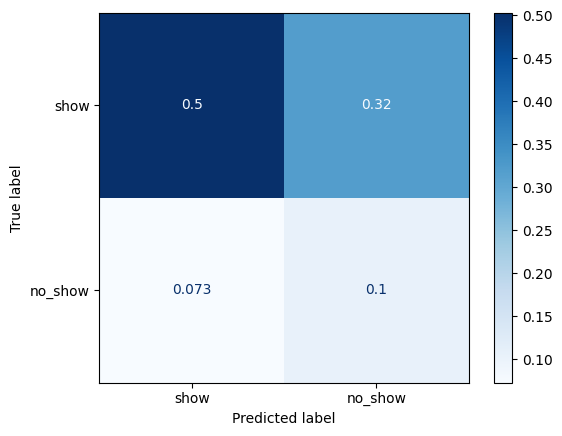

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
print('Accuracy on train data: ', accuracy_score(y_train,y_train_pred))
print('Accuracy on test data: ',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
confusion_mat = confusion_matrix(y_test,y_pred, normalize='all')
print(f'Confusion Matrix \n',confusion_mat)
ConfusionMatrixDisplay(confusion_mat,display_labels=['show','no_show']).plot(cmap=plt.cm.Blues)
plt.grid(False)


In [14]:
## XGB model with hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

#pipeline for preprocessing and handling imbalance data

pipeline = Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('xgb', XGBClassifier(objective='binary:logistic',
                              tree_method='hist',  # Uses GPU for histogram building
                              device='cuda',                # Selects the first GPU 
                              use_label_encoder=False, 
                              eval_metric='logloss'))

])

# defining parameter grid
param_dist = {
    'xgb__max_depth': [3, 5, 7, 9],
    'xgb__learning_rate': np.logspace(-3, -1, 10), # Search across orders of magnitude
    'xgb__n_estimators': [100, 500, 1000],
    'xgb__subsample': [0.6, 0.8, 1.0],
    'xgb__colsample_bytree': [0.6, 0.8, 1.0]
}

#Setup GridSearch with the Pipeline
random_search = RandomizedSearchCV(
    estimator=pipeline, 
    param_distributions=param_dist, 
    scoring='f1', 
    cv=3, 
    verbose=1,
    n_jobs=1 # Uses all CPU cores for faster tuning
)

#fitting to train and test data
random_search.fit(X_train_preprocessed,y_train)

print(f"Best Accuracy: {random_search.best_score_:.4f}")
print(f"Best Parameters: {random_search.best_params_}")

best_model = random_search.best_estimator_
y_train_pred = best_model.predict(X_train_preprocessed)
y_pred = best_model.predict(X_test_preprocessed)



Fitting 3 folds for each of 10 candidates, totalling 30 fits


d:\healthplusclinic\venv\Lib\site-packages\xgboost\training.py:200: UserWarning: [12:30:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\healthplusclinic\venv\Lib\site-packages\xgboost\training.py:200: UserWarning: [12:30:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\healthplusclinic\venv\Lib\site-packages\xgboost\training.py:200: UserWarning: [12:30:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\healthplusclinic\venv\Lib\site-packages\xgboost\training.py:200: UserWarning: [12:30:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

Best Accuracy: 0.9186
Best Parameters: {'xgb__subsample': 0.6, 'xgb__n_estimators': 100, 'xgb__max_depth': 3, 'xgb__learning_rate': np.float64(0.05994842503189409), 'xgb__colsample_bytree': 0.8}


Accuracy on train data:  0.9684583333333333
Accuracy on test data:  0.9697916666666667
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     19731
           1       0.85      1.00      0.92      4269

    accuracy                           0.97     24000
   macro avg       0.93      0.98      0.95     24000
weighted avg       0.97      0.97      0.97     24000

Confusion Matrix 
 [[0.79191667 0.03020833]
 [0.         0.177875  ]]


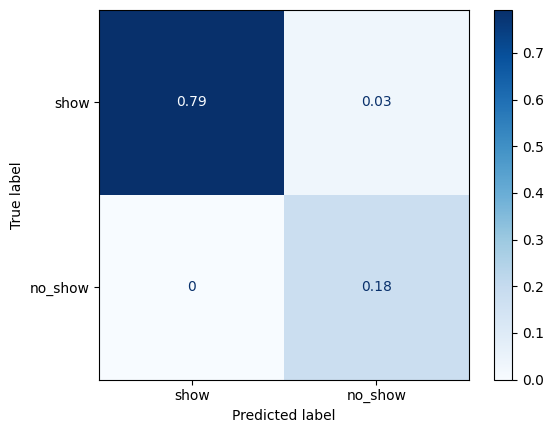

In [15]:
print('Accuracy on train data: ', accuracy_score(y_train,y_train_pred))
print('Accuracy on test data: ',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
confusion_mat = confusion_matrix(y_test,y_pred, normalize='all')
print(f'Confusion Matrix \n',confusion_mat)
ConfusionMatrixDisplay(confusion_mat,display_labels=['show','no_show']).plot(cmap=plt.cm.Blues)
plt.grid(False)

[0.9316251  0.0033623  0.0041899  ... 0.00345155 0.00389962 0.00341567]


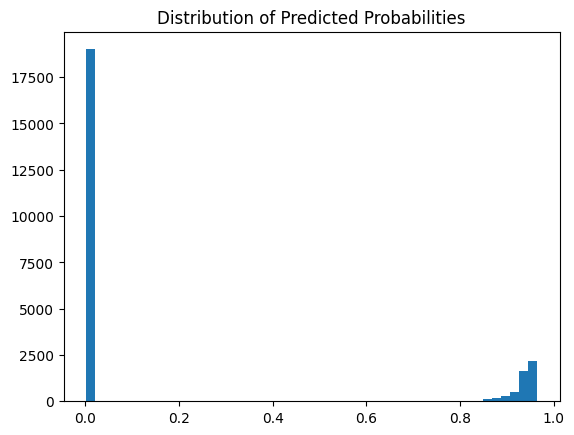

In [19]:
# Get probabilities instead of hard 0/1 predictions
y_probs = best_model.predict_proba(X_test_preprocessed)[:, 1]
print(y_probs)

plt.hist(y_probs, bins=50)
plt.title("Distribution of Predicted Probabilities")
plt.show()